<a href="https://colab.research.google.com/github/FelypeDantas/Estudos_Analytics/blob/main/Challenge1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Challenge de data science edição 1



Aqui fiz o importe do pandas o apelidando de pd, para manusear o arquivo json livremente e começar o desafio

In [6]:
import pandas as pd
import numpy as np

## Semana 1

Nesta semana foi me entregue um arquivo json para ser feito a limpeza dos dados, neste momento já identifiquei do que se tratam tais dados com a ajuda com README publicado pelo desafio, estarei deixando aqui sobre o que cada um se trata :

- customerID: número de identificação único de cada cliente
- Churn: se o cliente deixou ou não a empresa
- gender: gênero (masculino e feminino)
- SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
- Partner: se o cliente possui ou não um parceiro ou parceira
- Dependents: se o cliente possui ou não dependentes
- tenure: meses de contrato do cliente
- PhoneService: assinatura de serviço telefônico
- MultipleLines: assisnatura de mais de uma linha de telefone
- InternetService: assinatura de um provedor internet
- OnlineSecurity: assinatura adicional de segurança online
- OnlineBackup: assinatura adicional de backup online
- DeviceProtection: assinatura adicional de proteção no dispositivo
- TechSupport: assinatura adicional de suporte técnico, menos tempo de espera
- StreamingTV: assinatura de TV a cabo
- StreamingMovies: assinatura de streaming de filmes
- Contract: tipo de contrato
- PaperlessBilling: se o cliente prefere receber online a fatura
- PaymentMethod: forma de pagamento
- Charges.Monthly: total de todos os serviços do cliente por mês
- Charges.Total: total gasto pelo cliente

Agora começaremos vendo como está estruturado o arquivo e acrescentarei um gráfico para verificar se tem mais clientes que deixaram a empresa do que a Alura voz tem atualmente.

In [9]:
dados = pd.read_json('Telco-Customer-Churn.json')
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


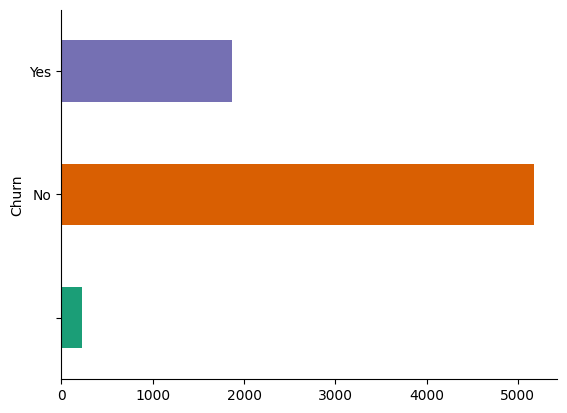

In [4]:
# @title Churn

from matplotlib import pyplot as plt
import seaborn as sns
dados.groupby('Churn').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Tipo de dados

Precisamos verificar os tipos dos dados, para isso vai ser melhor olhar pelo menos o primeiro indice de cada coluna para entender tais dados

In [5]:
dados.customer[0]

{'gender': 'Female',
 'SeniorCitizen': 0,
 'Partner': 'Yes',
 'Dependents': 'Yes',
 'tenure': 9}

In [6]:
dados.phone[0]

{'PhoneService': 'Yes', 'MultipleLines': 'No'}

In [7]:
dados.internet[0]

{'InternetService': 'DSL',
 'OnlineSecurity': 'No',
 'OnlineBackup': 'Yes',
 'DeviceProtection': 'No',
 'TechSupport': 'Yes',
 'StreamingTV': 'Yes',
 'StreamingMovies': 'No'}

In [8]:
dados.account[0]

{'Contract': 'One year',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Mailed check',
 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}

Ao observar podemos ver que os dados estão em formato de dicionário. E isso é ruim porque se torna dificil de visualizar uma informação, por isso iremos separar esses dados em colunas.

In [3]:
import pandas as pd

In [10]:
customer_dados = pd.json_normalize(dados.customer)
customer_dados

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [11]:
phone_dados = pd.json_normalize(dados.phone)
phone_dados

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [12]:
internet_dados = pd.json_normalize(dados.internet)
internet_dados

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [13]:
account_dados = pd.json_normalize(dados.account, sep='')
account_dados

,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


#### Juntando todas as normalizações
Para realizar a junção das informações, é necessário utilizar o método pd.concat().

Construímos uma função para realizar a normalização dos objetos json e a junção das informações em um DataFrame.

Esse procedimento é mostrado na aula Empilhando DataFrames do curso Python Pandas: técnicas avançadas

In [14]:
def normalize_json(dataframe):
    return_dataframe = pd.DataFrame()
    for column in list(dados.columns[2:]):
        dataframe_column = pd.json_normalize(dataframe[column])
        return_dataframe = pd.concat([return_dataframe, dataframe_column], axis=1)

    return pd.concat([dataframe[list(dados.columns[:2])], return_dataframe], axis=1)

In [15]:
dados = normalize_json(dados)
dados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


Com o método info(), visualizamos todas as colunas que foram geradas a partir da junção dos DataFrames.

In [16]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Vamos utilizar o método value_counts() em cada uma das colunas para indentificar possíveis categorias com nomes incorretos ou incoerentes.

In [17]:
for coluna in dados.columns:
    print('---')
    print(dados[coluna].value_counts())

---
customerID
0002-ORFBO    1
6614-VBEGU    1
6637-KYRCV    1
6635-MYYYZ    1
6635-CPNUN    1
             ..
3374-TTZTK    1
3374-PZLXD    1
3374-LXDEV    1
3373-YZZYM    1
9995-HOTOH    1
Name: count, Length: 7267, dtype: int64
---
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
---
gender
Male      3675
Female    3592
Name: count, dtype: int64
---
SeniorCitizen
0    6085
1    1182
Name: count, dtype: int64
---
Partner
No     3749
Yes    3518
Name: count, dtype: int64
---
Dependents
No     5086
Yes    2181
Name: count, dtype: int64
---
tenure
1     634
72    369
2     246
3     207
4     185
     ... 
38     60
39     59
44     54
36     50
0      11
Name: count, Length: 73, dtype: int64
---
PhoneService
Yes    6560
No      707
Name: count, dtype: int64
---
MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64
---
InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, d

É possível perceber na variável Churn que há uma categoria que não está nomeada, representando dados faltantes. Dados faltantes não nos trazem informação útil para análise e portanto devemos removê-los do conjunto de dados.

In [18]:
dados['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


Para remover os dados com nome vazio, fazemos uma seleção na coluna Churn em que no nome seja diferente de vazio (''). Armazenamos o resultado na variável dados.

In [19]:
dados = dados[dados['Churn']!= '']
dados.reset_index(drop=True, inplace=True)

Ao fim da execução do código, podemos identificar que a variável Churn não apresenta mais a classe com nome vazio.

In [20]:
dados['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


Outra coluna que apresenta dados vazios (' ') é a Charges.Total. Essa coluna tem uma relação com Charges.Monthly e tenure.

A coluna tenure representa a quantidade de meses em que o cliente estava assinando o serviço. A coluna Charges.Monthly representa os gastos mensais do cliente e Charges.Total é a quantidade total de gastos, portanto seria uma multiplicação de Charges.Monthly por tenure.

Vamos selecionar todas as linhas onde o tenure = 0, ou seja, os clientes que assinaram o serviço por 0 meses, e mostrar os resultados para as colunas Charges.Total e Charges.Monthly.

In [21]:
dados.query('tenure == 0')[['Charges.Total', 'Charges.Monthly', 'tenure']]

,Charges.Total,Charges.Monthly,tenure
945,,56.05,0
1731,,20.00,0
1906,,61.90,0
2025,,19.70,0
2176,,20.25,0
2250,,25.35,0
2855,,73.35,0
3052,,25.75,0
3118,,52.55,0
4054,,80.85,0


Verificamos que quando tenure = 0, os dados de Charges.Total é vazio (' ').

Vamos agora selecionar os dados onde Charges.Total = ' ', mostrando os resultados para Charges.Monthly e tenure.

In [22]:
dados[dados['Charges.Total'] == ' '][['Charges.Total', 'Charges.Monthly', 'tenure']]

,Charges.Total,Charges.Monthly,tenure
945,,56.05,0
1731,,20.00,0
1906,,61.90,0
2025,,19.70,0
2176,,20.25,0
2250,,25.35,0
2855,,73.35,0
3052,,25.75,0
3118,,52.55,0
4054,,80.85,0


Percebe-se que todas as linhas de Charges.Total que estão vazias é porque o cliente não assinou nem por um mês. Temos que preencher esse valor com o mesmo valor que está presente em "Charges.Monthly" pois esse representa o total.

In [23]:
idx = dados[dados['Charges.Total'] == ' '].index
dados.loc[idx, "Charges.Total"] = dados.loc[idx, "Charges.Monthly"]

In [24]:
dados.query('tenure == 0')[['Charges.Total', 'Charges.Monthly', 'tenure']]

,Charges.Total,Charges.Monthly,tenure
945,56.05,56.05,0
1731,20.0,20.00,0
1906,61.9,61.90,0
2025,19.7,19.70,0
2176,20.25,20.25,0
2250,25.35,25.35,0
2855,73.35,73.35,0
3052,25.75,25.75,0
3118,52.55,52.55,0
4054,80.85,80.85,0


Por fim, vamos modificar o tipo da variável para float, uma vez que o tipo estava como object.

In [25]:
dados['Charges.Total'] = dados['Charges.Total'].astype('float64')

<ipython-input-25-3f7d7ea2280e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Charges.Total'] = dados['Charges.Total'].astype('float64')


Por fim, vamos armazenar os dados tratados em um arquivo Telco-Customer-Churn-limpeza.json na pasta Dados com o método to_json().

Os dados podem ser armazenados em qualquer formato de arquivo, por exemplo o csv com o método to_csv().

In [27]:
import os

# Create the directory if it doesn't exist
os.makedirs("../Dados", exist_ok=True)

# Now you can save the data
dados.to_json("../Dados/Telco-Customer-Churn-limpeza.json")

## Semana 2

Depois da limpeza inicial dos dados, é ideal fazer uma análise gráfica para entender quais as variáveis que são relacionadas com o churn para que a equipe de vendas tenha uma noção do cenário atual, e também para que nós possamos entender de uma forma mais clara e formar possíveis hipóteses do que está acontecendo com os clientes.

O primeiro passo é importar as bibliotecas que vamos utilizar durante o processo e nesse passo também vamos importar algumas função do utils, um arquivo em Python, onde criamos funções auxiliares para que nosso processo neste notebook não ficasse tão poluído. É interessante utilizar esse tipo de abordagem quando queremos usar as funções em mais de um notebook.

In [29]:
import sys
sys.path.append('../')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from plotly.express import box
from utils import plot_countplot, heatmap_corr

#### Analisando Churn
Para começar a analisar, vamos utilizar o método .describe() para entender alguns métodos estatísticos que temos dentro da base de dados.

O método describe() fornece as informações sobre:

count - Conta a quantidade de número de valores não vazios. Com esses valores podemos entender melhor o tamanho da amostra.

mean - O valor médio, em média aritmética. Como ele faz uma média aritmética nem sempre mostra a realidade da maior parte dos casos do banco de dados.

std - O desvio padrão. É a medida de como os dados se dispersam em relação à média, ou seja, o quanto eles estão espalhados.

min e max - Valores que auxiliam a identificar a amplitude da amostra, entre o valor mínimo e máximo.

quartis - Valores que nos mostram de que forma os dados foram distribuídos, por exemplo em 50% é a mediana e metade dos valores são inferiores a X valor, a outra metade é superior àquele valor.

Para saber mais sobre esse método, acesse o artigo Ampliando a análise com o Describe.

In [30]:
dados.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992
std,0.368612,24.559481,30.090047,2266.730170
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


from matplotlib import pyplot as plt
_df_0['SeniorCitizen'].plot(kind='hist', bins=20, title='SeniorCitizen')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['tenure'].plot(kind='hist', bins=20, title='tenure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Charges.Monthly'].plot(kind='hist', bins=20, title='Charges.Monthly')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Charges.Total'].plot(kind='hist', bins=20, title='Charges.Total')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='SeniorCitizen', y='tenure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='tenure', y='Charges.Monthly', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Charges.Monthly', y='Charges.Total', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['SeniorCitizen'].plot(kind='line', figsize=(8, 4), title='SeniorCitizen')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['tenure'].plot(kind='line', figsize=(8, 4), title='tenure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Charges.Monthly'].plot(kind='line', figsize=(8, 4), title='Charges.Monthly')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Charges.Total'].plot(kind='line', figsize=(8, 4), title='Charges.Total')
plt.gca().spines[['top', 'right']].set_visible(False)

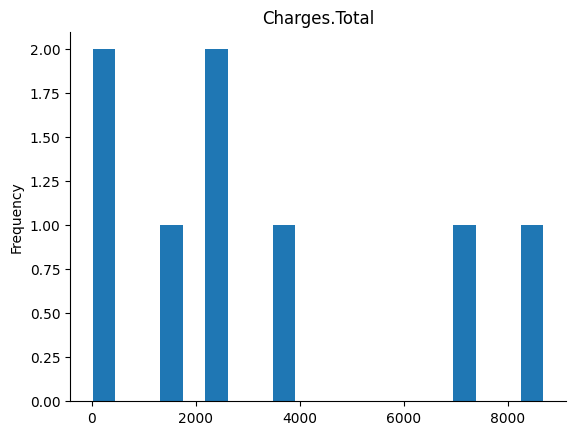

In [31]:
from matplotlib import pyplot as plt
_df_3['Charges.Total'].plot(kind='hist', bins=20, title='Charges.Total')
plt.gca().spines[['top', 'right',]].set_visible(False)

Podemos observar que apenas 4 colunas podem ser analisadas com o método .describe(), então vamos utilizar o .dtypes para entender quais são os tipos de dados que temos dentro da nossa base de dados.

In [32]:
dados.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


Como podemos observar, a maior parte dos dados que temos é object, e o método não consegue trabalhar com variáveis categóricas a não ser que seja passado um parâmetro permitindo essa inclusão, porém algumas das nossas análises do método .describe() podem ser perdidas.

In [33]:
dados.describe(include=[object])

,customerID,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,0002-ORFBO,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,5174,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


O nosso método .describe() retornou 3 linhas diferentes das que já conheciamos:

- unique é a quantidade de valores únicos
- top é o valor mais comum
- freq é a frequência do valor mais comum

Mas mesmo com esses valores, ainda fica complicado de obtermos respostas e de passarmos algo concreto para o time do comercial avaliar, principalmente para formular alguma hipótese sobre o churn, por isso agora vamos passar para a parte gráfica.

#### Análises gráficas
Nesta parte é interessante focar em quais visualizações serão melhores para apresentar para nossos companheiros de equipe, e para isso podemos ver o vídeo Data Visualization: tipos de visualização. Os gráficos podem ser feitos usando o Matplotlib, Seaborn ou alguma outra biblioteca gráfica da sua escolha.

A primeira análise a ser feita é da distribuição da variável target, Churn, para entender quantos casos nós temos de pessoas que cancelaram contrato e quantas ainda estão com o contrato ativo. Para isso, vamos utilizar a função plot_countplot do arquivo utils, que utiliza o countplot da biblioteca Seaborn e você pode conferir mais sobre ele no curso Data Visualization: explorando com Seaborn e para saber específicamente sobre a função, pode conferir pela documentação.

/content/utils.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=x, hue=hue, data=dados, palette='viridis')


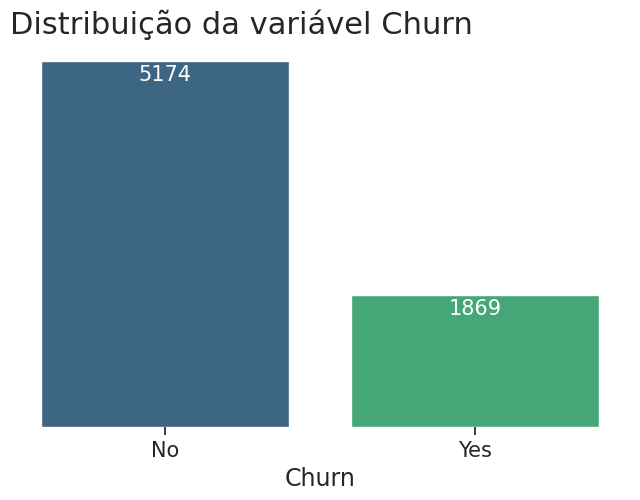

In [34]:
plot_countplot(dados=dados,
               x='Churn',
               titulo="Distribuição da variável Churn",
               label_x='Churn',
    )

Podemos analisar também por variável de gênero para ver se existe algum impacto a pessoa ser, nesse caso, do gênero masculino ou feminino

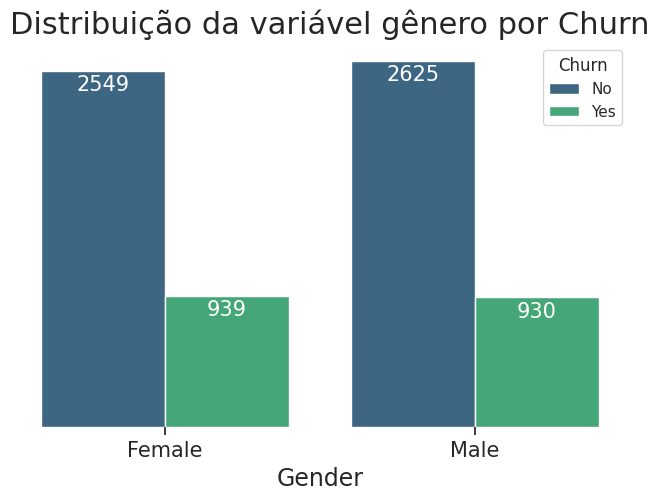

In [35]:
plot_countplot(dados=dados,
               x='gender',
               titulo="Distribuição da variável gênero por Churn",
               label_x='Gender',
               hue='Churn'
    )

Podemos identificar que a variável "gender" não possui impacto no churn, uma vez que a proporção de pessoas que cancelaram o serviço entre os genêros é a mesma.

Vamos plotar os gráficos para os serviços de internet:

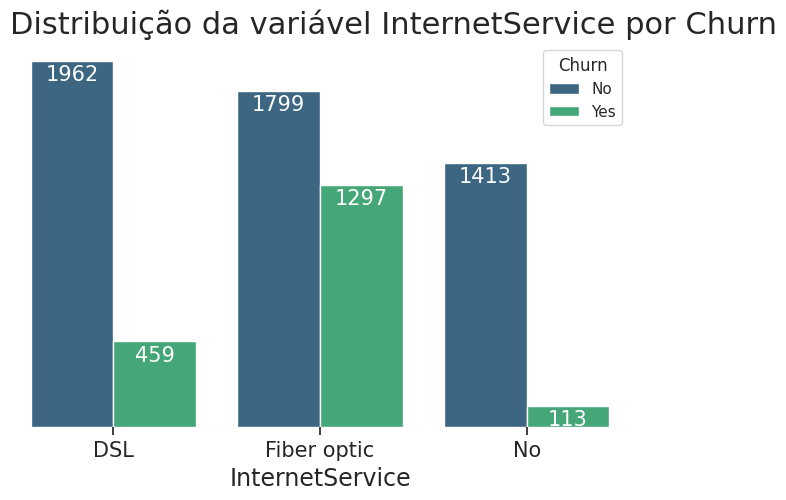

In [36]:
plot_countplot(dados=dados,
               x='InternetService',
               titulo="Distribuição da variável InternetService por Churn",
               label_x='InternetService',
               hue='Churn'
    )

Percebe-se analisando o gráfico acima que os clientes que utilizam fibra ótica como serviço de internet possuem uma taxa de churn proporcionalmente maior que os demais. A Alura Voz poderia oferecer mais o tipo de serviço DSL já que possui uma evasão menor, ou identificar quais problemas que está acontecendo com o serviço de fibra ótica e melhorá-lo

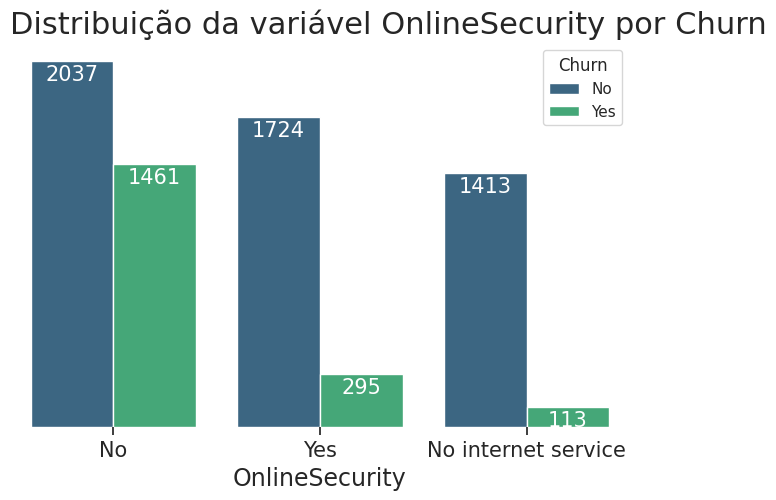

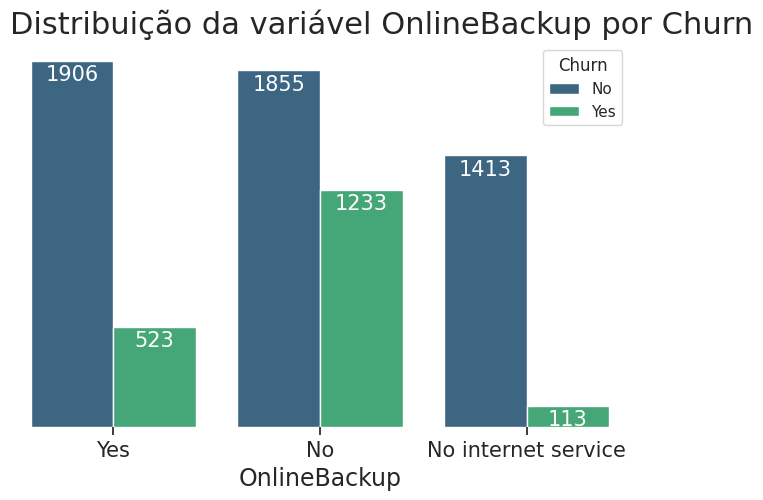

In [37]:
plot_countplot(dados=dados,
               x='OnlineSecurity',
               titulo="Distribuição da variável OnlineSecurity por Churn",
               label_x='OnlineSecurity',
               hue='Churn'
    )


plot_countplot(dados=dados,
               x='OnlineBackup',
               titulo="Distribuição da variável OnlineBackup por Churn",
               label_x='OnlineBackup',
               hue='Churn'
    )

Do gráfico acima temos que os clientes que não assinam a segurança online e também não possuem backup online tendem a deixar de utilizar os serviços da Alura Voz. Oferecer um serviço de segurança online e backup online seria uma uma boa opção para reduzir a taxa de cancelamentos.

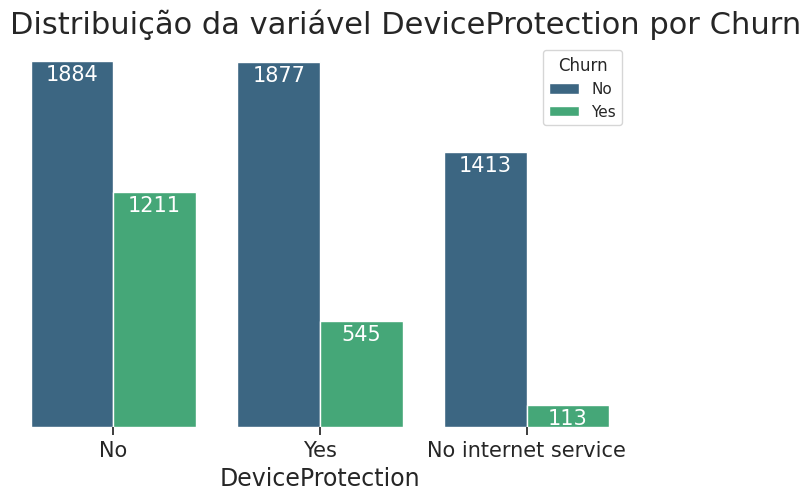

In [38]:
plot_countplot(dados=dados,
               x='DeviceProtection',
               titulo="Distribuição da variável DeviceProtection por Churn",
               label_x='DeviceProtection',
               hue='Churn'
    )

Do gráfico acima temos que os clientes que não possuem a proteção do dispositivo tendem a deixar de utilizar os serviços da Alura Voz. Oferecer um serviço de proteção é uma boa opção para reduzir a taxa de cancelamento.

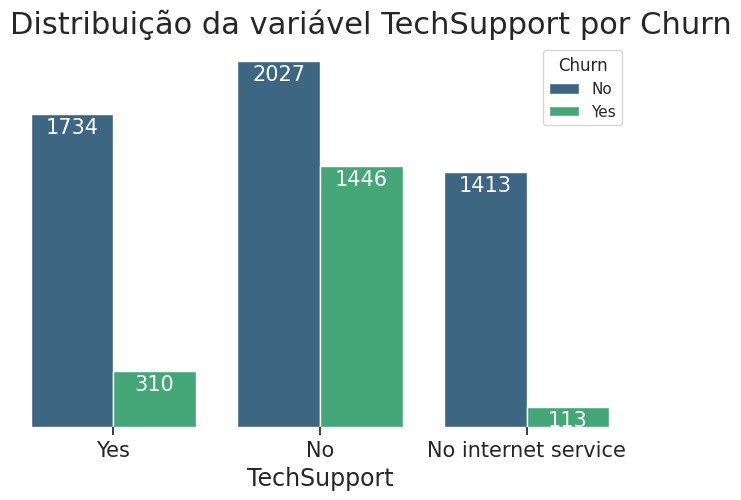

In [39]:
plot_countplot(dados=dados,
               x='TechSupport',
               titulo="Distribuição da variável TechSupport por Churn",
               label_x='TechSupport',
               hue='Churn'
    )

Clientes que não possuem suporte técnico tendem a deixar de utilizar os serviços da Alura Voz. Oferecer um serviço de suporte técnico é uma boa opção para reduzir a taxa de cancelamentos.

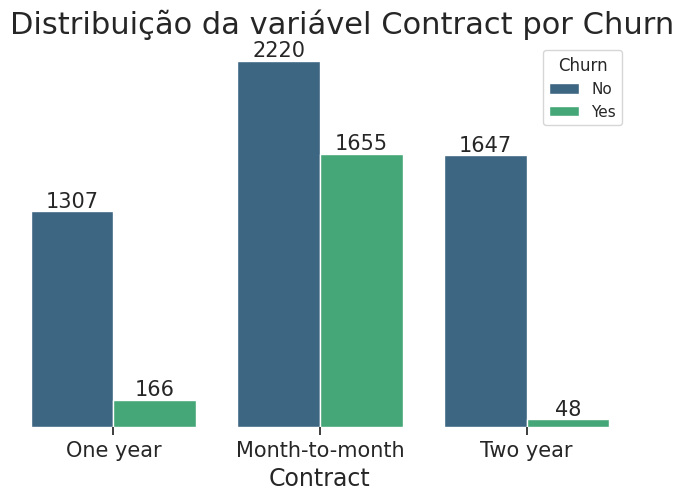

In [40]:
plot_countplot(dados=dados,
               x='Contract',
               titulo="Distribuição da variável Contract por Churn",
               label_x='Contract',
               hue='Churn',
               small=True
    )

Pelo gráfico acima temos que os clientes que possuem um contrato mensal são os que tendem a deixar de utilizar os serviços da Alura Voz. Oferecer um serviço de contrato anual ou de dois anos é uma boa opção para reduzir a taxa de cancelamentos.

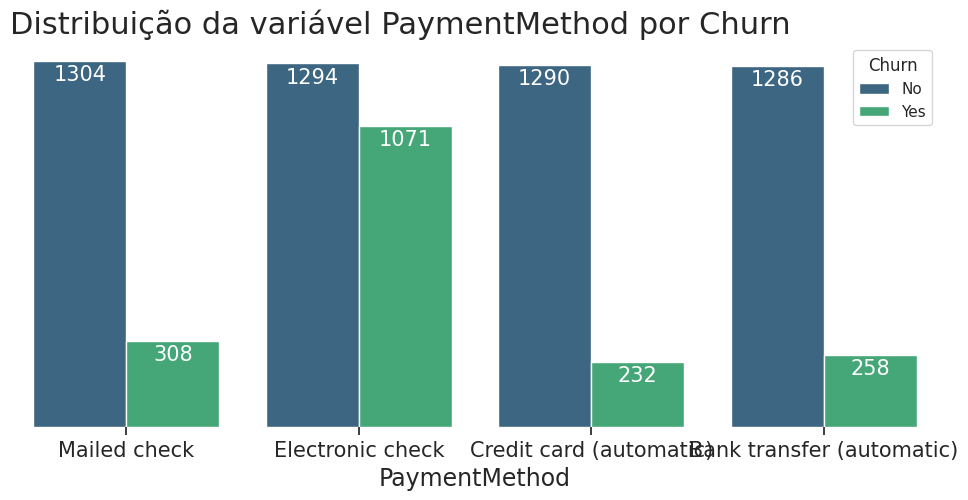

In [41]:
plot_countplot(dados=dados,
               x='PaymentMethod',
               titulo="Distribuição da variável PaymentMethod por Churn",
               label_x='PaymentMethod',
               hue='Churn',
               figsize=(12, 5)
    )

Percebemos que as pessoas utilizam o método de pagamento "Eletronic check" tendem a cancelar os serviços da Alura Voz. Direcionar os clientes para outro método de pagamento é uma boa opção para reduzir a taxa de cancelamentos.

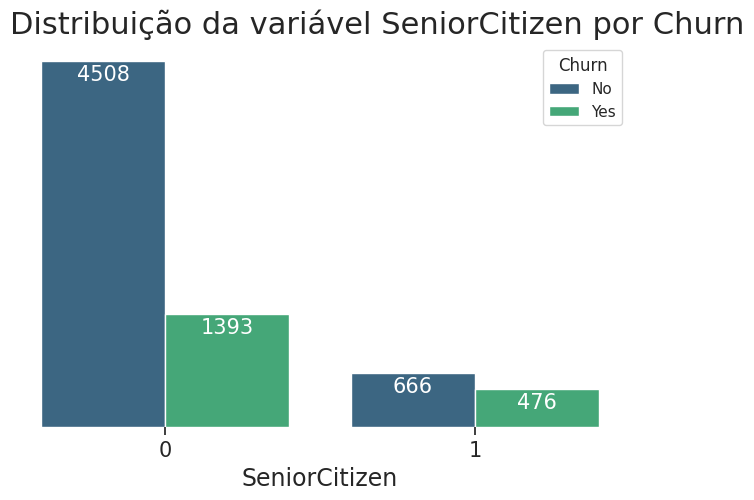

In [42]:
plot_countplot(dados=dados,
               x='SeniorCitizen',
               titulo="Distribuição da variável SeniorCitizen por Churn",
               label_x='SeniorCitizen',
               hue='Churn'
    )

Apesar da quantidade de clientes idosos ser menor, a proporção de clientes que cancelaram o serviço entre os idosos é maior que a de clientes que não são idosos. Entender os motivos que estão levando a essa taxa de cancelamento entre os idosos e adotar medidas para melhorar o serviço para esses clientes é uma boa opção para reduzir a taxa de cancelamento.

Para fazer uma análise mais aprofundada podemos aplicar o boxplot, e para conhecer melhor pode ler esse artigo: Melhorando a análise com o Boxplot.

In [43]:
for col in ['tenure', 'Charges.Monthly']:
    fig = box(dados, x=col, color='Churn', orientation='h')
    fig.show()

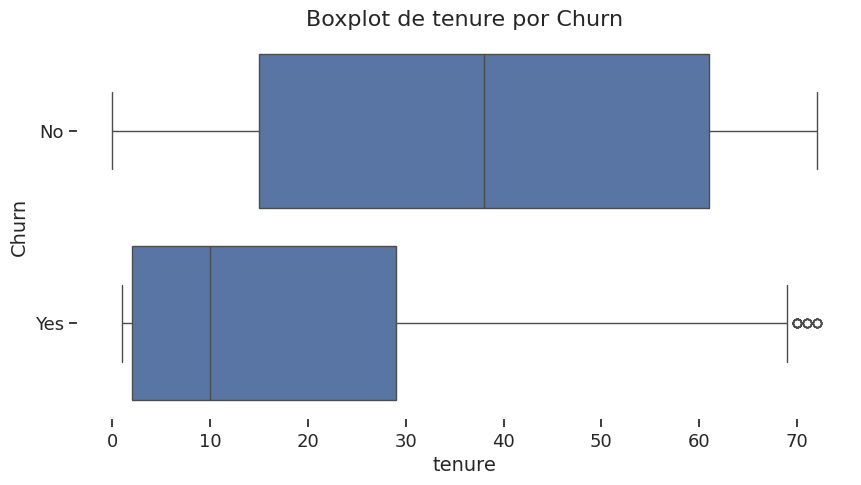

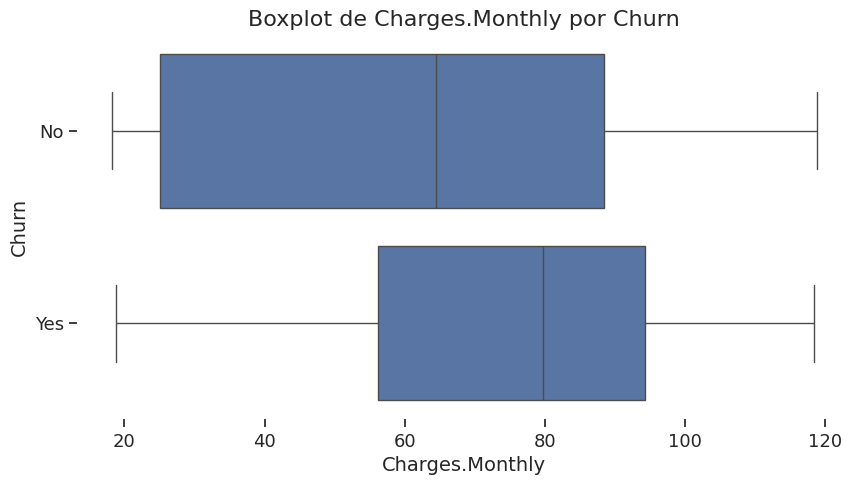

In [44]:
for col in ['tenure', 'Charges.Monthly']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=col, y='Churn', data=dados)
    plt.title(f"Boxplot de {col} por Churn", fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Churn', fontsize=14)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()

Analisando a feature "tenure", que representa o tempo de contrato do cliente, percebe-se que clientes que estão a mais tempo tendem a continuar a utilizar o serviço.

Para a feature "Charges.Monthly", percebe-se que os clientes que adquirem serviços mais baratos tendem a continuar utilizando o serviço.

#### Analisando feature
Vamos analisar as features "tenure" e "Charges.Monthly" e "Charges.Total" que aparentemente estão correlacionadas.

In [46]:
def heatmap_corr(df, figsize: tuple = (8, 6)):
    # Select only numeric features for correlation calculation
    numeric_df = df.select_dtypes(include=['number'])
    corr = numeric_df.corr()
    plt.figure(figsize=figsize)
    sns.heatmap(corr,
                annot=True,
                fmt=".2f",
                cmap='Blues')
    plt.title('Correlation Matrix', fontsize=16)
    plt.show()

In [47]:
dados[['Charges.Monthly', 'Charges.Total']].corr()

,Charges.Monthly,Charges.Total
Charges.Monthly,1.000000,0.651182
Charges.Total,0.651182,1.000000


As features "tenure" e "Charges.Total" possuem uma correlação forte, o que significa que a medida que uma aumenta a outra aumenta também. Não é muito interessante trabalharmos com duas features correlacionadas, portanto vamos remover a feature "Charges.Total"

## Semana 3

In [48]:
import sys
sys.path.append('../')

import pandas as pd
import seaborn as sns

from utils import plot_countplot, plot_matriz_confusao, compara_modelos_metricas
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

sns.set_theme(style="darkgrid")
SEED = 42

Agora, é preciso remover algumas colunas que não são tão importantes para a análise que desejamos realizar. O método que permite remover colunas é o drop() da biblioteca pandas.

Existem duas colunas que não são interessantes para a análise e que serão removidas:

- Coluna custumerID: Seu valor é único para cada linha e não nos traz informação relevante para uma análise, então podemos retirá-la; e
- Coluna Charges.Total: essa coluna contém informações dos meses de Charges.Monthly multiplicado por tenure, então é uma informação "duplicada".

In [49]:
dados.drop(['customerID', 'Charges.Total'], axis=1, inplace=True)

<ipython-input-49-1bfe5793a586>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Vamos imprimir as classes de cada coluna que seja do tipo categórica para entender quais tratamentos e onde podem ser realizados.

In [50]:
for i in dados.select_dtypes(include=['object']).columns:
    if len(dados[i].unique()) > 2:
       print(f"{i}: {dados[i].unique()}")

MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


É possível notar que algumas colunas tem a classe No phone service e No internet service que equivale a classe No, ou seja, não existe serviço. Para essas classes, vamos considerá-las como No para evitar uma informação duplicada. Como terão apenas dois resultados Yes e No (Sim e Não), substituiremos por um número binário, 1 e 0.

Além disso, as colunas 'PaymentMethod', 'Contract' e 'InternetService' possuem mais de 2 categorias e por conta disso, faremos encoding para os dados dessas colunas.

In [51]:
colunas = ['PaymentMethod', 'Contract', 'InternetService']
dados2 = dados.drop(colunas, axis=1)
dados2.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'Charges.Monthly'],
      dtype='object')

In [52]:
dicionario = {'No internet service':0,
              'No phone service': 0,
              'No': 0,
              'Yes': 1,
              'Male':0,
              'Female':1}

In [53]:
dados2 = dados2.replace(dicionario)
dados2.head()

<ipython-input-53-3309cdce4b73>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly
0,0,1,0,1,1,9,1,0,0,1,0,1,1,0,1,65.6
1,0,0,0,0,0,9,1,1,0,0,0,0,0,1,0,59.9
2,1,0,0,0,0,4,1,0,0,0,1,0,0,0,1,73.9
3,1,0,1,1,0,13,1,0,0,1,1,0,1,1,1,98.0
4,1,1,1,1,0,3,1,0,0,0,0,1,1,0,1,83.9


Existem várias formas de criar encoding, duas delas são o Label Encoding e o One-Hot Encoding.

#### Tipos de encoding
Label Encoding - Renomea as classes com valores numéricos de 1 a n, sendo n o número de classes. Pode existir hierarquia entre as classes.

One-Hot Encoding - Transforma as variáveis em n colunas binárias, sendo n o número de classes. Todas as classes são analisadas de forma igual, quando tiver a ocorrência dela a coluna terá o valor 1 e quando não o valor 0, isso acontece para as demais colunas criadas.

No nosso caso, vamos optar pelo método que transforma as variáveis em colunas binárias. Para saber mais sobre esse método consulte a documentação.

OneHotEncoder documentation.
É possível também preparar essa forma de encoding com get_dummies do pandas, se quiser saber mais sobre esse método e o primeiro, recomendamos a leitura do artigo Pandas Get Dummies (One-Hot Encoding) – pd.get_dummies().

Fique a vontade para testar as duas maneiras.

In [55]:
ohe = OneHotEncoder(dtype=int, sparse_output=False, handle_unknown='ignore') #  sparse=False to return a dense array

colunas_ohe = ohe.fit_transform(dados[colunas])
dados3 = pd.concat([dados2, pd.DataFrame(colunas_ohe, columns=ohe.get_feature_names_out(colunas))], axis=1) # Use get_feature_names_out instead of get_feature_names
dados3

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,1,0,1,1,9,1,0,0,1,...,0,0,0,1,0,1,0,1,0,0
1,0,0,0,0,0,9,1,1,0,0,...,0,0,0,1,1,0,0,1,0,0
2,1,0,0,0,0,4,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,1,0,1,1,0,13,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
4,1,1,1,1,0,3,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,0,0,13,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
7039,1,0,0,1,0,22,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
7040,0,0,0,0,0,2,1,0,0,1,...,0,0,0,1,1,0,0,1,0,0
7041,0,0,0,1,1,67,1,0,1,0,...,0,0,0,1,0,0,1,1,0,0


Agora, temos dados apenas com valores numéricos.

#### Balanceamento de dados

/content/utils.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




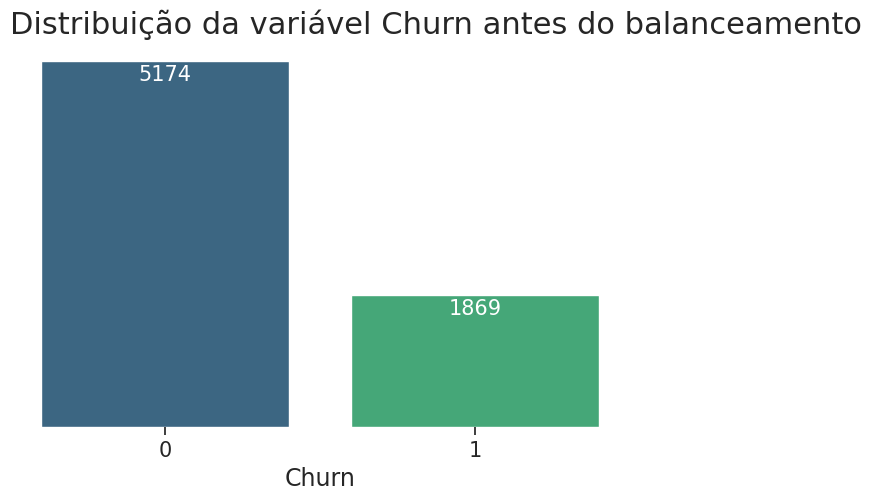

In [56]:
plot_countplot(dados=dados3,
               x='Churn',
               titulo="Distribuição da variável Churn antes do balanceamento",
               label_x='Churn'
    )

Percebemos pelo gráfico acima que o conjunto de dados possui o alvo (coluna 'Churn') desbalanceado, caso o modelo seja criado com a variável dessa forma poderá prejudicar o aprendizados e os resultados.

Para evitar problemas no aprendizado do modelo, vamos realizar o balanceamento com o método SMOTE da biblioteca imblearn.

In [57]:
X = dados3.drop(['Churn'], axis = 1)
y = dados3['Churn']

In [58]:
sm = SMOTE(random_state=SEED)
X_res, y_res = sm.fit_resample(X, y)

In [59]:
dados4 = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)

/content/utils.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




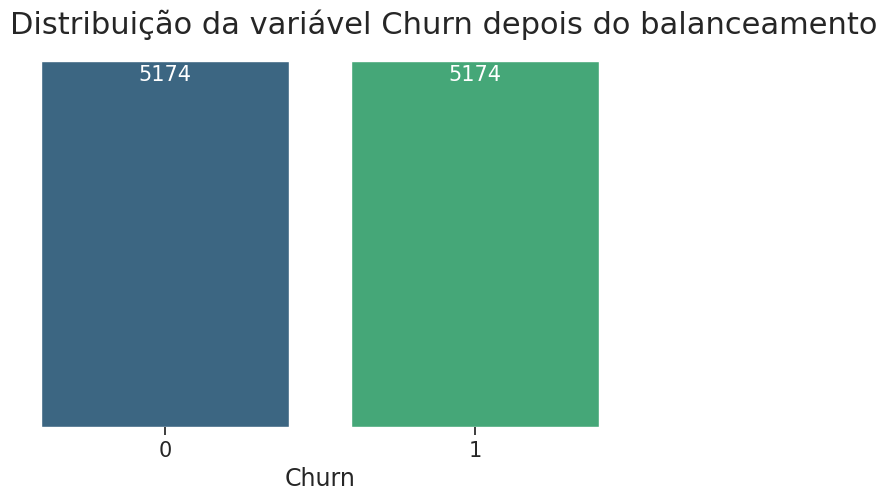

In [60]:
plot_countplot(dados=dados4,
               x='Churn',
               titulo="Distribuição da variável Churn depois do balanceamento",
               label_x='Churn'
    )

Agora, dados4 estão com os valores da coluna alvo com as mesmas quantidades, ou seja, estão balanceados. Portanto, utilizaremos dados4 para construção dos modelos de classificação.

In [61]:
dados4.to_json("../Dados/Telco-Customer-Churn-balanceamento.json")

### Criando os modelos
Para iniciar o treinamento, separamentos os dados em treino e teste.


In [62]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_res , y_res, random_state=SEED)

#### 1. SVC
O primeiro modelo a ser montado é o classificador SVC, para montá-lo utilizamos o método SVC da biblioteca sklearn.

Para saber mais sobre esse método você pode acessar o vídeo Estimadores não lineares e support vector machine do curso Machine Learning: introdução a classificação com SKLearn.

In [63]:
svc = SVC(random_state=SEED)
svc.fit(X_treino, y_treino)
y_pred_svc = svc.predict(X_teste)

Após treinado o modelo, precisamos saber quão bem ele foi em seu treinamento, para isso coletamos as classificações a partir de um conjunto de dados desconhecido pelo modelo, o conjunto de teste.

As respostas da avaliação de cada item do conjunto de teste realizada pelo modelo podem ser verificadas para sabermos quão bem ele foi em seu teste. A avaliação consiste na análise de várias métricas que informam o sucesso do modelo. As métricas que iremos avaliar serão Acurácia, Precisão, Recall e F1 Score e a Matriz de Confusão

Essas métricas nós obtemos pela função plot_matriz_confusao() para analisarmos o resultado final do modelo.

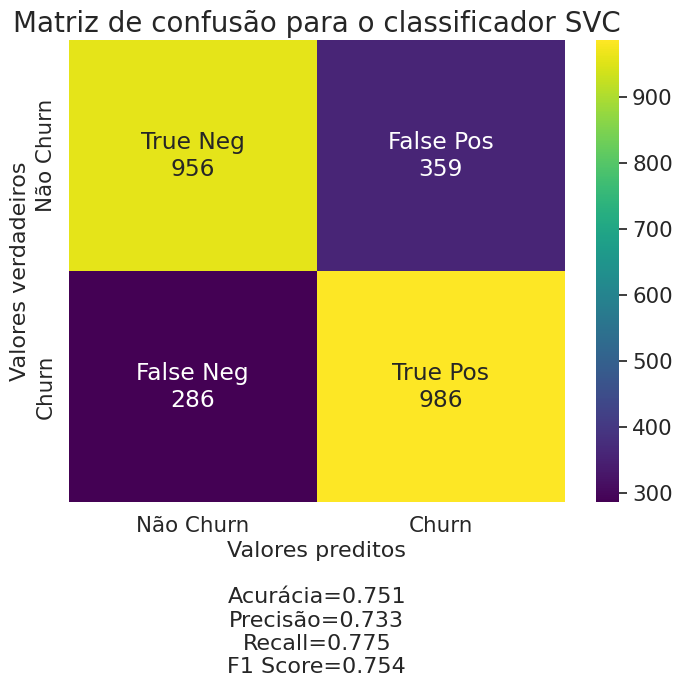

In [64]:
labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = ["Não Churn", "Churn"]
plot_matriz_confusao(y_teste,
                      y_pred_svc,
                      group_names=labels,
                      categories=categories,
                      figsize=(8, 6),
                      title="Matriz de confusão para o classificador SVC"
            )

#### 2. Decision Tree
O segundo modelo a ser montado é o classificador Decision Tree, para montá-lo utilizamos o método Decision Tree da biblioteca sklearn.

E para saber mais sobre esse método você pode acessar o vídeo Árvores de Decisão: aprofundando em modelos de Machine Learning.

Depois do treinado o modelo, testamos ele e plotamos a matriz de confusão e outras métricas, pela função plot_matriz_confusao() para analisarmos o resultado final do modelo.

In [65]:
dtree = DecisionTreeClassifier(max_depth=5, random_state = SEED)
dtree.fit(X_treino, y_treino)
y_pred_dt = dtree.predict(X_teste)

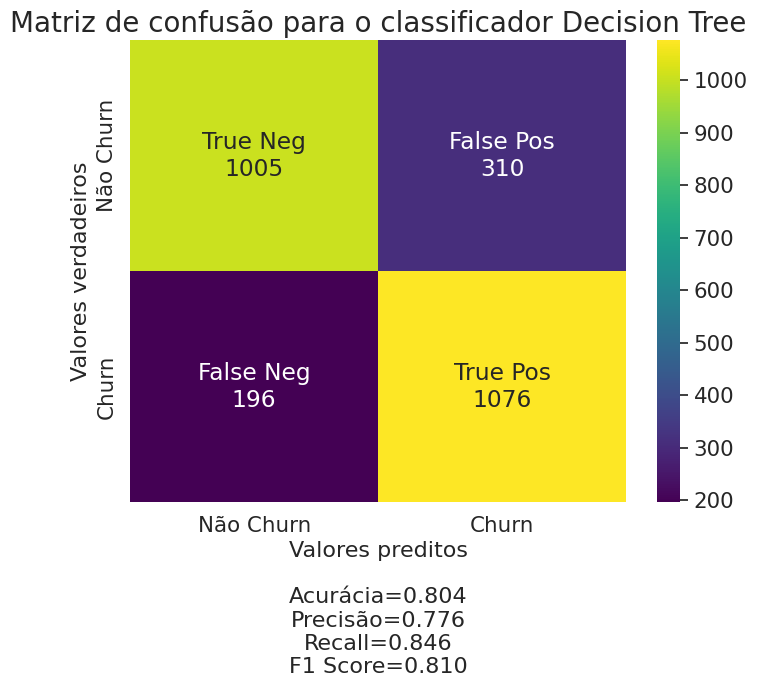

In [66]:
labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = ["Não Churn", "Churn"]
plot_matriz_confusao(y_teste,
                      y_pred_dt,
                      group_names=labels,
                      categories=categories,
                      figsize=(8, 6),
                      title="Matriz de confusão para o classificador Decision Tree")

#### 3. Random Forest

O segundo modelo a ser montado é o classificador Decision Tree, para montá-lo utilizamos o método Random Forest da biblioteca sklearn.

E para saber mais sobre esse método você pode acessar o vídeo Árvores de Decisão: aprofundando em modelos de Machine Learning.

Depois do treinado o modelo, testamos ele e plotamos a matriz de confusão e outras métricas, pela função plot_matriz_confusao() para analisarmos o resultado final do modelo.

In [67]:
rforest = RandomForestClassifier(max_depth = 5, random_state=SEED)
rforest.fit(X_treino, y_treino)
y_pred_rf = rforest.predict(X_teste)

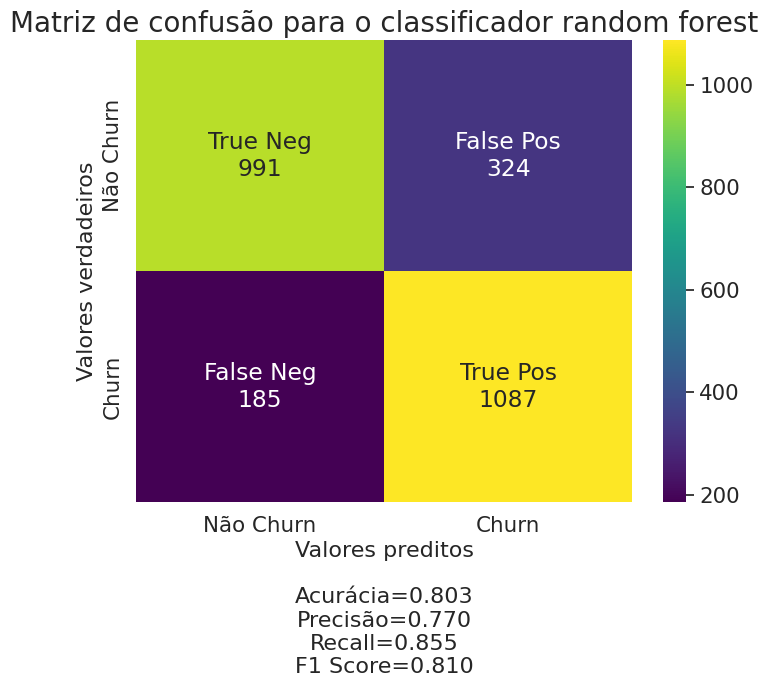

In [68]:
labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = ["Não Churn", "Churn"]
plot_matriz_confusao(y_teste,
                      y_pred_rf,
                      group_names=labels,
                      categories=categories,
                      figsize=(8, 6),
                      title="Matriz de confusão para o classificador random forest")

#### Comparando os modelos
Após o treino e teste dos modelos SVC, Decision Tree e Random Forest, podemos fazer as comparações entre os resultado obtidos para descobrir o melhor modelo.

Para isso, coletamos as métricas de classificação dos três dos modelos agrupamos em uma tabela de comparação.

In [69]:
modelos = ['svc', 'decision tree', 'random forest']
y_pred_treinos = [svc.predict(X_treino), dtree.predict(X_treino), rforest.predict(X_treino)]
y_pred_testes = [y_pred_svc, y_pred_dt, y_pred_rf]

In [70]:
tabelo_modelos = compara_modelos_metricas('Recall', modelos, y_treino, y_pred_treinos, y_teste, y_pred_testes)
tabelo_modelos

,Modelo,Acurácia Treino,Acurácia Teste,Precisão,Recall,F1-Score
0,random forest,0.812138,0.803247,0.770376,0.854560,0.810287
1,decision tree,0.814586,0.804407,0.776335,0.845912,0.809631
2,svc,0.751707,0.750676,0.733086,0.775157,0.753535


## Semana 4


In [72]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd

from utils import plot_matriz_confusao
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

SEED = 42

Aqui está a versão formatada corretamente com Markdown para sua descrição:

---

# Análise de Modelos

Sabendo que é preciso escolher o melhor modelo desenvolvido, faremos uma análise do resultado obtido no estudo anterior, ordenado pelo valor de **Recall**:

### Tabela dos modelos ordenada pelo Recall

| Modelo          | Acurácia Treino | Acurácia Teste | Precisão  | Recall    | F1-Score |
|------------------|:---------------:|:--------------:|:---------:|:---------:|:--------:|
| 0 Random Forest  | 0.809818        | 0.800928       | 0.769395  | 0.849843  | 0.80762  |
| 1 Decision Tree  | 0.814715        | 0.804407       | 0.776335  | 0.845912  | 0.809631 |
| 2 SVC            | 0.751965        | 0.750676       | 0.733086  | 0.775157  | 0.753535 |

---

## Sobre o Recall

O **Recall** é uma métrica que avalia se as previsões positivas foram feitas corretamente, ou seja, analisa a quantidade de Verdadeiros Positivos (True Pos) em relação aos Falsos Negativos (False Neg). Assim, quanto maior o Recall, mais acertos o modelo obteve para as classes positivas.

---

## Escolha do Melhor Modelo

Com base na análise acima, utilizaremos o modelo que obteve o melhor Recall, que é o **Random Forest**.

In [73]:
dados = pd.read_json("../Dados/Telco-Customer-Churn-balanceamento.json")
dados.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Churn
0,1,0,1,1,9,1,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0
1,0,0,0,0,9,1,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,0,0,0,0,4,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,1
3,0,1,1,0,13,1,0,0,1,1,...,0,1,0,1,0,0,0,1,0,1
4,1,1,1,0,3,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,1


Para otimizar o modelo, primeiro precisamos criar o conjunto de treino de teste. Desse modo, dividimos o conjunto de dados em entrada (X) e saida (y), ou alvo.

In [74]:
X = dados.drop(['Churn'], axis=1)
y = dados['Churn']

E assim podemos separar os dados em treino e teste com train_test_split.

In [75]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

É preciso definir os hiperparâmetros a serem otimizados pelo GridSearchCV, os quais:

- n_estimators: número de árvores de decisão;
- criterion: critério de decisão;
- max_features: número máximo de variáveis a serem utilizadas ao procurar melhor divisão;
- max_depth: profundidade máxima da árvore de decisão;
- min_samples_split: número mínimo de amostras necessárias para que uma divisão seja feita;
- min_samples_leaf: número mínimo de amostras necessárias para que uma folha seja formada;
- bootstrap: indica se foi realizada uma reamostragem dos dados na criação dos modelos de árvore de decisão.

In [76]:
n_estimators = np.arange(100, 200, step=20)
criterion = ["gini", "entropy"]
max_features = ["auto", "log2"]
max_depth = list(np.arange(2, 10, step=2))
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [2, 4]
bootstrap = [True, False]

parameters = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

Agora, podemos utilizar o otimizador GridSearchCV para melhorar a mética Recall. Para isso, foi criado um objeto GridSearchCV e nele foi passado como parâmetros o nosso modelo, os hipermparametros definidos anteriormente e a métrica a ser otimizada, Recall. Bem como, realizamos o ajuste com o método fit().

Para saber mais sobre o GridSearchCV e seus parrâmetros você pode consultar a documentação.

In [77]:
clf = GridSearchCV(RandomForestClassifier(random_state=SEED), parameters, cv=3, n_jobs=-1, scoring="recall")
clf.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning:


1920 fits failed out of a total of 3840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
817 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/u

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([100, 120, 140, 160, 180])},
             scoring='recall')

Após o ajuste, conseguimos analisar os resultados obtidos:

In [78]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1244,1.267906,0.072927,0.075729,0.001402,False,entropy,8,log2,2,2,180,"{'bootstrap': False, 'criterion': 'entropy', '...",0.893846,0.886241,0.883167,0.887751,0.004489,1
1249,1.190885,0.002931,0.078862,0.006080,False,entropy,8,log2,2,4,180,"{'bootstrap': False, 'criterion': 'entropy', '...",0.893846,0.886241,0.883167,0.887751,0.004489,1
1248,1.072627,0.016321,0.069109,0.001142,False,entropy,8,log2,2,4,160,"{'bootstrap': False, 'criterion': 'entropy', '...",0.892308,0.886241,0.882398,0.886982,0.004079,3
1243,1.795202,0.296540,0.134974,0.007805,False,entropy,8,log2,2,2,160,"{'bootstrap': False, 'criterion': 'entropy', '...",0.892308,0.886241,0.882398,0.886982,0.004079,3
938,1.536134,0.188599,0.099403,0.023805,False,gini,8,log2,2,8,160,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.896923,0.885473,0.877018,0.886471,0.008157,5


Para obtermos os melhores resultados do otimizador utilizamos o comando best_params_:

In [79]:
clf.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 180}

Com isso, conseguimos criar um estimador de Random Forest com os melhores hiperparâmetros:

In [80]:
rforest = RandomForestClassifier(**clf.best_params_, random_state=SEED)

In [81]:
model = rforest.fit(x_train, y_train)  # treinamento com os dados de treino
y_pred = rforest.predict(x_test)  # realizando as predições

Podemos analisar assim, se o modelo realmente obteve resultados melhores na métrica de Recall utilizanod a função plot_matriz_confusao:

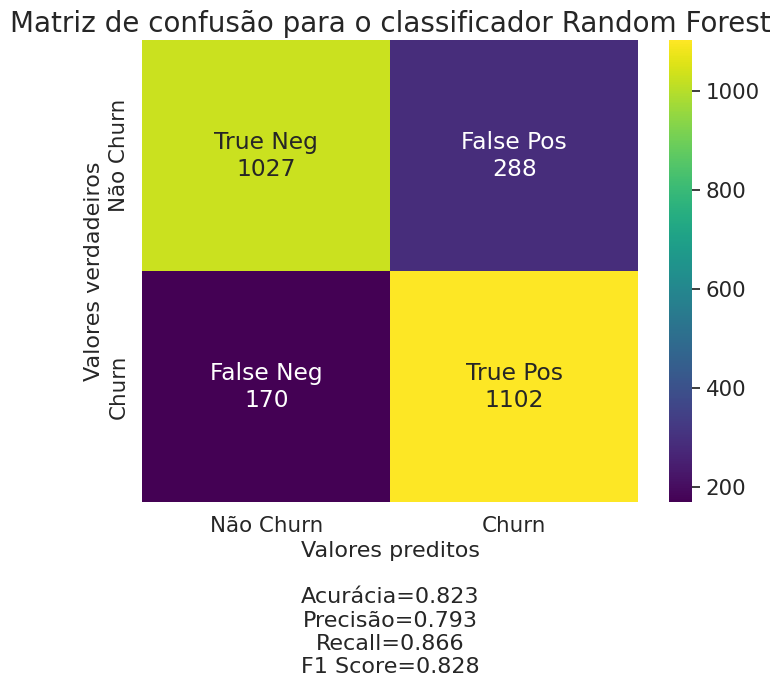

In [82]:
labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = ["Não Churn", "Churn"]
plot_matriz_confusao(y_test,
                      y_pred,
                      group_names=labels,
                      categories=categories,
                      figsize=(8, 6),
                      title="Matriz de confusão para o classificador Random Forest")

In [83]:
print(f"Acurácia de treinamento: {rforest.score(x_train, y_train) * 100:.2f}%")

Acurácia de treinamento: 84.80%


Percebe-se que o recall e as outras métricas aumentaram com o modelo otimizado.